# World Happiness Report 2021

In [131]:
import pandas as pd
import seaborn as sns

# DataFrame che assegna un punteggio alla felicità delle varie nazioni nel 2021
df = pd.read_csv('2021.csv')

In [132]:
# Visualizzare le statistiche di base
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [133]:
# Esempio di dati
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [134]:
# Data cleansing
df = df.drop(columns=['Ladder score in Dystopia', 'Dystopia + residual', 'upperwhisker', 'lowerwhisker'])

### 3 statistiche che possano avere senso rispetto ai dati scelti

<AxesSubplot:>

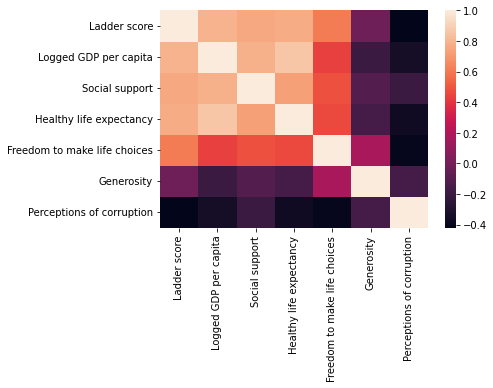

In [135]:
# 1) Visualizza la correlazione tra le qualità delle nazioni e il loro punteggio 
qualities = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
corr = df[qualities].corr()
sns.heatmap(corr)

# Punti interessanti:
# - Logged GDP per capita     - Ladder score
# - Generosity                - Ladder score
# - Perceptions of corruption - Ladder score

<AxesSubplot:>

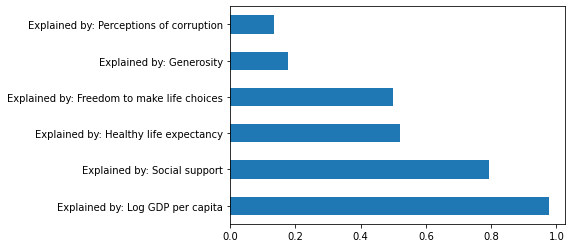

In [136]:
# 1) Verifica la correlazione calcolata nella matrice di correlazione tramite le colonne 'Explained by:'
qualities_explainedby = ['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']
df[qualities_explainedby].mean().plot(kind='barh')

Text(0.5, 1.0, 'Happiness by GDP per capita')

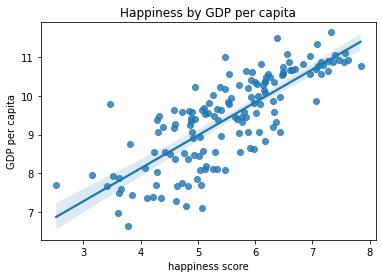

In [137]:
# 2) Visualizza il punteggio delle nazioni all'aumento del GDP per capita
plt = sns.regplot(x=df['Ladder score'], y=df['Logged GDP per capita'])
plt.set_xlabel('happiness score')
plt.set_ylabel('GDP per capita')
plt.set_title('Happiness by GDP per capita')

# Conclusioni:
# - Il GDP per capita è un buon indicatore della felicità nelle nazioni

Text(0.5, 1.0, 'Happiness by generosity')

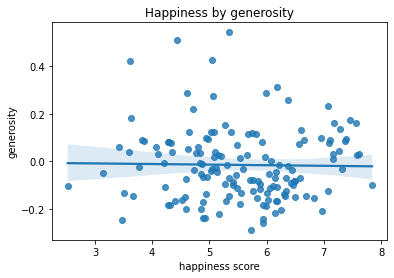

In [138]:
# 2) Visualizza il punteggio delle nazioni relativamente all'andamento
#    della generosità della popolazione
plt = sns.regplot(x=df['Ladder score'], y=df['Generosity'])
plt.set_xlabel('happiness score')
plt.set_ylabel('generosity')
plt.set_title('Happiness by generosity')

# Conclusioni:
# - La generosità non influenza la felicità nelle nazioni

Text(0.5, 1.0, 'Happiness by perceptions of corruption')

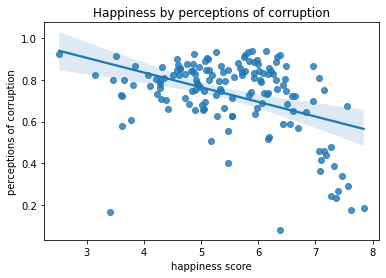

In [139]:
# 2) Visualizza il punteggio delle nazioni relativamente all'andamento
#    della percezione di corruzione
plt = sns.regplot(x=df['Ladder score'], y=df['Perceptions of corruption'])
plt.set_xlabel('happiness score')
plt.set_ylabel('perceptions of corruption')
plt.set_title('Happiness by perceptions of corruption')

# Conclusioni:
# - La percezione di corruzione influenza in maniera negativa la felicità nelle nazioni
# - La linea di regressione non rappresenta in maniera completa gli ultimi punti del grafico

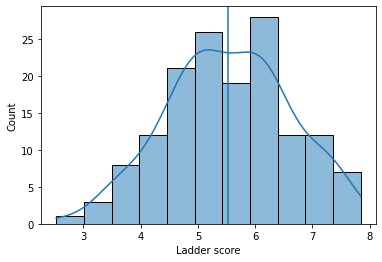

In [140]:
# 3) Visualizza dov'è collocata la maggior parte delle nazioni nella scala
plt = sns.histplot(df['Ladder score'], kde=True)

#    Indica il punto della scala dove sono presenti più nazioni
plt.axvline(df['Ladder score'].mean())

<AxesSubplot:ylabel='Regional indicator'>

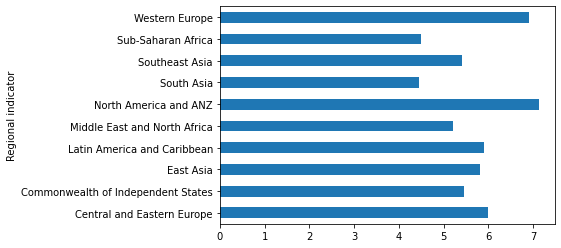

In [141]:
# 4) Visualizza il punteggio medio degli stati di ogni regione
df.groupby('Regional indicator')['Ladder score'].mean().plot(kind='barh')

### List of Countries by number of Internet Users merge

In [142]:
df_I = pd.read_csv('List of Countries by number of Internet Users - Sheet1.csv')

# Data cleansing
df_I['Country name'] = df_I['Country or Area']
df_IL = df.merge(df_I, how='left', on='Country name')
df_IL['Percentage'] = df_IL['Percentage'].str.replace(',*%', '', regex=True).astype(float) / 100

df_IL.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,...,0.741,0.691,0.124,0.481,Finland,"4,831,170","5,523,231",83.0,0.8747,29
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,...,0.763,0.686,0.208,0.485,Denmark,"5,567,278","5,733,551",79.0,0.9710,9
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,...,0.816,0.653,0.204,0.413,Switzerland,"7,942,864","8,476,005",57.0,0.9371,19
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,...,0.772,0.698,0.293,0.170,Iceland,"329,196","335,025",164.0,0.9826,3
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,...,0.753,0.647,0.302,0.384,Netherlands,"15,877,494","17,035,938",41.0,0.9320,20


<AxesSubplot:>

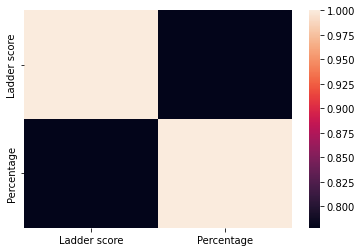

In [143]:
corr = df_IL[['Ladder score', 'Percentage']].corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='Ladder score', ylabel='Percentage'>

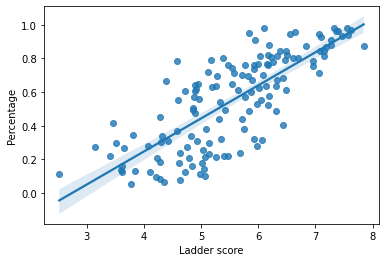

In [144]:
sns.regplot(x=df_IL['Ladder score'], y=df_IL['Percentage'])

<AxesSubplot:xlabel='Percentage', ylabel='Count'>

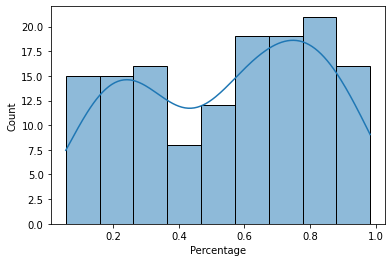

In [145]:
sns.histplot(df_IL['Percentage'], kde=True)